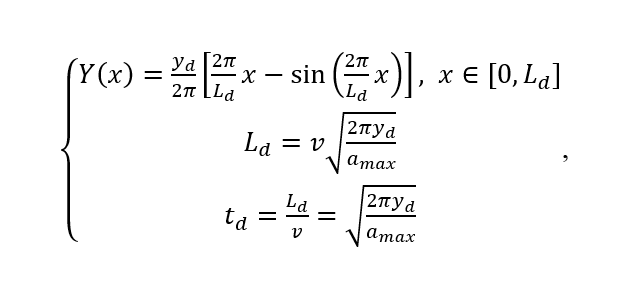

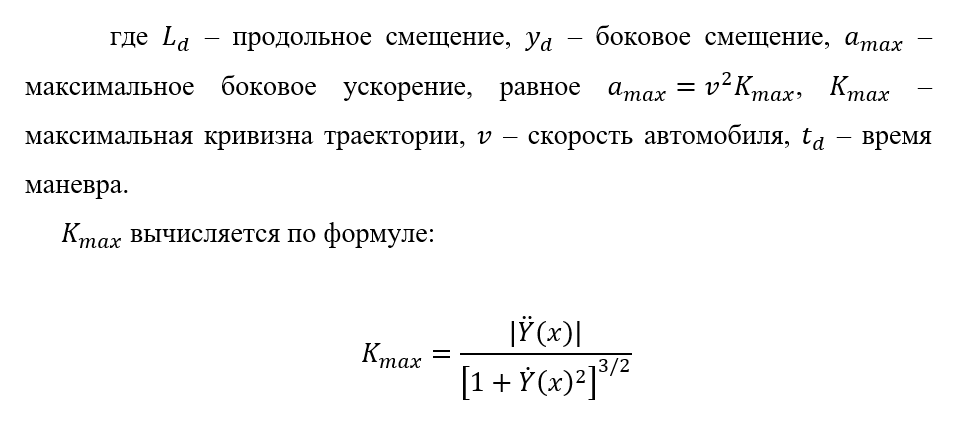

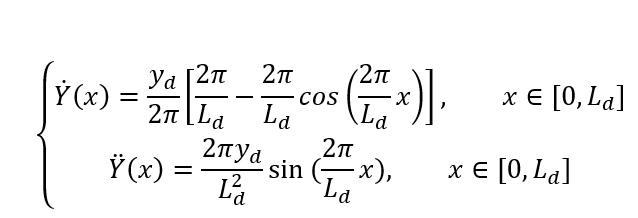

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [24]:
v = 2
yd = 3.75
Ld = 20
def path_planer(v, yd=3.75, Ld=20):
    # Ld = v * math.sqrt((2 * math.pi * yd) / a_max)
    x = np.arange(0, Ld, 1)
    Y = yd/(2*math.pi) * (2*math.pi*x/Ld - np.sin(2*math.pi*x/Ld))
    # Y1 = (0.5 * yd / math.pi) * (2*math.pi/Ld - (2*math.pi/Ld)*math.cos(2*math.pi*x/Ld))
    # Y2 = (2*math.pi*yd/Ld ** 2) * math.sin(2*math.pi*x/Ld)
    td = Ld / v
    # K_max = abs(Y2)/pow((1 + Y1 ** 2), 3/2)
    # a_max = K_max * v ** 2
    return Y, td

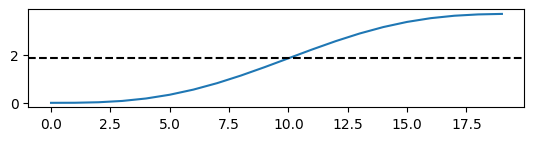

In [25]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
Y, t = path_planer(v)
x = np.arange(0, Ld, 1)
plt.plot(x, Y)
plt.axhline(yd/2, color='black', linestyle='--')

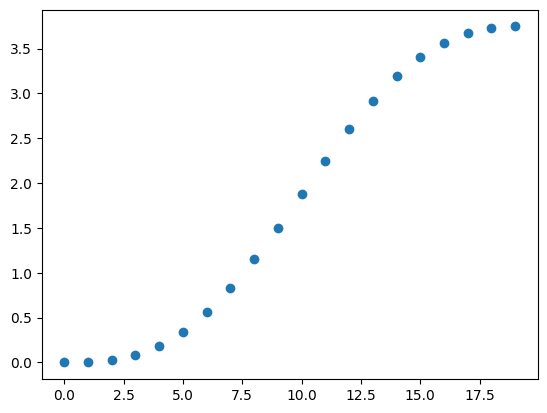

In [26]:
plt.scatter(x,Y)

In [ ]:
bin_map = config_space[int(angle_to_goal // config.angle_step),: ,:], angle_step = 20

In [ ]:
def process_frame(H, raw_lanes, det_img, bboxes, old_bboxes, depth_img, dt, kernel):
    ipm_map = ipm_ll(raw_lanes, H)
    det_ipm = ipm_ll(det_img, H)
    lanes_map, peaks = lanes2map(ipm_map)
    steer = lane_centering(peaks)
    if bboxes is not None:
        bird_eye_map = vehicles2map(bboxes, lanes_map)
        obstacle_map = vehicles2map(bboxes, np.zeros_like(lanes_map))
        vel_graph = test_func(bboxes, old_bboxes, dt, depth_img)
        if vel_graph is not None:
            expanded_map2 = expand(vel_graph, obstacle_map)
        else:
            expanded_map2 = np.zeros_like(lanes_map)
        # depth_img = cv2.medianBlur(depth_img, 17)
        '''try this for blur: dtype=np.float32'''
        '''check rotations in config space'''
        '''expand map along y, make map scaling'''
        
    else:
        bird_eye_map = lanes_map
        obstacle_map = np.zeros_like(lanes_map)
        expanded_map2 = np.zeros_like(lanes_map)

    expanded_map = fast_convolution(expanded_map2, kernel)

    return bird_eye_map, steer, expanded_map, lanes_map, det_ipm


In [ ]:
def create_map2(data, dt, kernel):
    H = find_homography()
    raw_lanes1, bboxes1, old_bboxes1, det_img1, depth_img1, raw_lanes2, bboxes2, old_bboxes2, det_img2, depth_img2 = data
    bird_eye_map1, steer1, expanded_map1, lanes_map1, det_ipm1 = process_frame(H, raw_lanes1, det_img1, bboxes1, old_bboxes1, depth_img1, dt, kernel)
    bird_eye_map2, _, expanded_map2, lanes_map2, det_ipm2 = process_frame(H, raw_lanes2, det_img2, bboxes2, old_bboxes2, depth_img2, dt, kernel)    
    merged_map = merge_frames(expanded_map1, expanded_map2)

    return merged_map